In [1]:
import os,sys
import numpy as np
import pandas as pd
import ibmseti
import collections
import scipy.io
import matplotlib.pyplot as plt
import commonutils as cu
import PIL
from PIL import Image

Using TensorFlow backend.


In [2]:
import keras
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

## Converting all files to images (skip if already exists)

In [2]:
# Run through directory 
specPath = "data/specdataraw/"
savePath = "data/specdataimages/"
image_size = (1024,224)
specfiles = [f for f in os.listdir(specPath) if os.path.isfile(os.path.join(specPath, f))]
for i in range(len(specfiles)):
    # Convert and save each file as image
    fname = specfiles[i].split(".")[0]
    print "\r{0}".format(i),
    spec = np.load("{}{}.npy".format(specPath,fname))
    cu.datautils.saveImageFromSpec(spec,image_size,save=True,filename="{}{}".format(savePath,fname))

15984


## Looking at VGG model activations

In [4]:
# Loading in table with info on files
fileListDF = pd.read_csv("fileList.csv")
# Loading in an arbitrary file
imgPath = "data/specdataimages/"
fnum = 25
imgfiles = [f for f in os.listdir(imgPath) if os.path.isfile(os.path.join(imgPath, f))]
image = np.asarray(Image.open(os.path.join(imgPath,imgfiles[fnum])))
print imgfiles[fnum]
print fileListDF.ix[int(imgfiles[fnum].split(".")[0])]

000167.jpg
file_name                0275169d-361b-4393-a295-f43bfe59ede8.dat
signal_classification                               narrowbanddrd
uuid                         0275169d-361b-4393-a295-f43bfe59ede8
file_index                                                    167
Name: 167, dtype: object


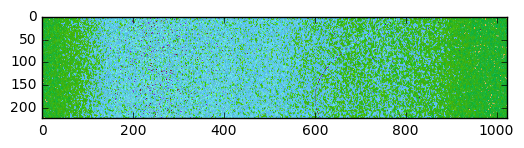

In [24]:
image = image.astype('float32')
image = np.expand_dims(image,axis=0)
image = preprocess_input(image)
plt.imshow(image[0])
plt.show()

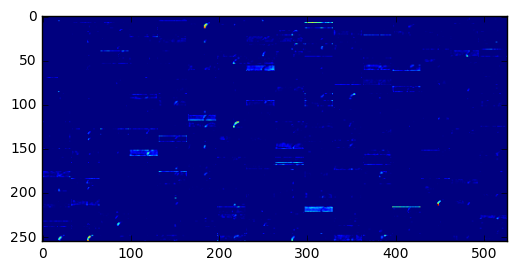

In [29]:
# Loading in the model
base_model = VGG16(weights='imagenet', include_top=False)
# Viewing VGG activations on the entire image 
imageAct = cu.datautils.modelActivations(base_model,'block5_pool',image,save=True,show=True)

## Generating all activations

In [3]:
# Point to directory
# Call model activations function
cu.datautils.generateAllActivations("data/specdataimages/","data/specdataactivations")

File 32 / 15985: 001080.jpg

KeyboardInterrupt: 